# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:

import numpy as np
import os
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('data/temps.csv')


In [3]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [4]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [6]:

from sklearn.tree import DecisionTreeRegressor  # o DecisionTreeClassifier según el objetivo
# Mapeo de días de la semana a números
week_mapping = {
    'Mon': 0,
    'Tues': 1,
    'Wed': 2,
    'Thurs': 3,
    'Fri': 4,
    'Sat': 5,
    'Sun': 6
}

# Aplicar el mapeo y convertir a int64
df['week'] = df['week'].map(week_mapping).astype('int64')



In [7]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,4,45,45,45.6,45,43,50,44,29
1,2016,1,2,5,44,45,45.7,44,41,50,44,61
2,2016,1,3,6,45,44,45.8,41,43,46,47,56
3,2016,1,4,0,44,41,45.9,40,44,48,46,53
4,2016,1,5,1,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,1,42,42,45.2,47,41,50,47,47
344,2016,12,28,2,42,47,45.3,48,41,49,44,58
345,2016,12,29,3,47,48,45.3,48,43,50,45,65
346,2016,12,30,4,48,48,45.4,57,44,46,44,42


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    int64  
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 32.8 KB


<Axes: >

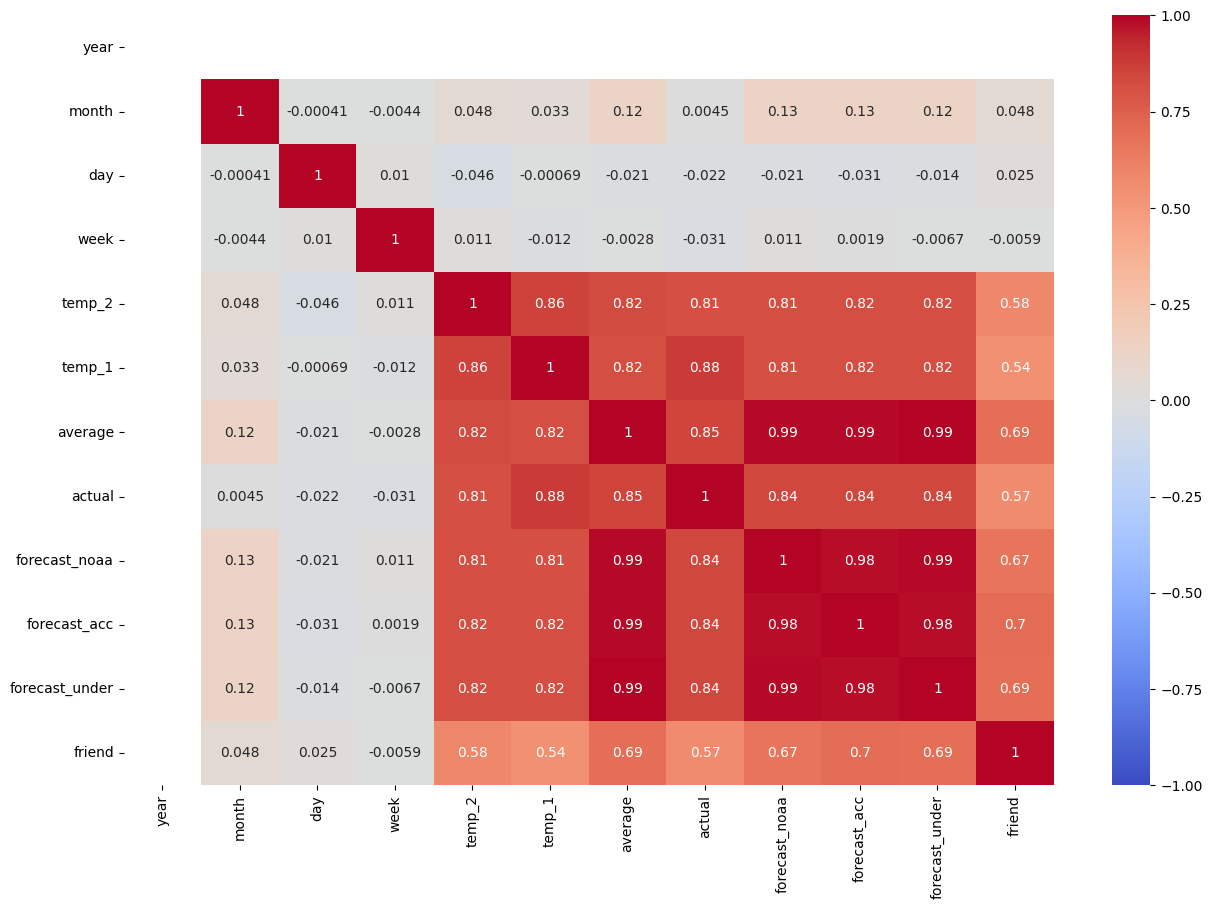

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1)

c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been as

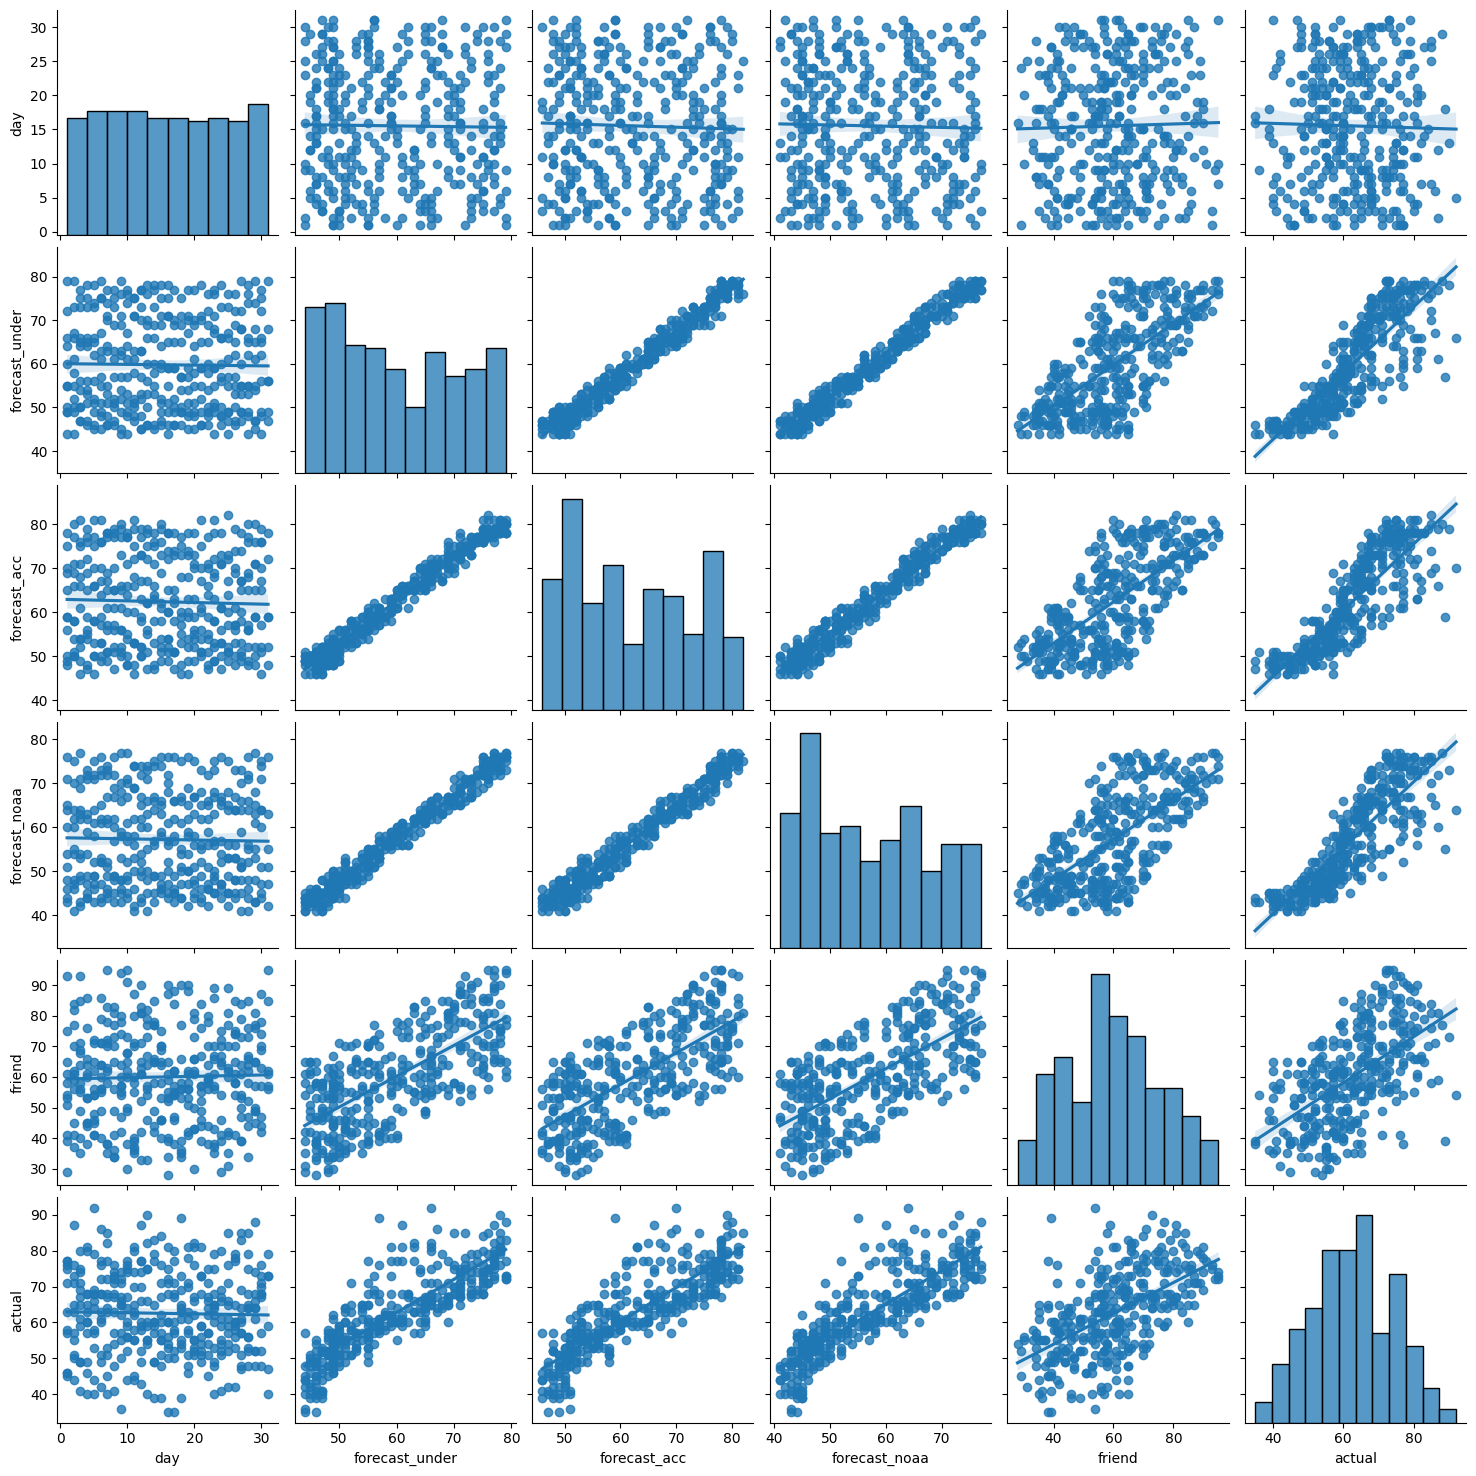

In [10]:
sns.pairplot(df[['day', 'forecast_under', 'forecast_acc', 'forecast_noaa', 'friend', 'actual']], 
             kind= "reg", palette= "Set1")

### 3. Selecciona variables y divide en train y test

In [11]:
df.drop(['year', 'week'], axis=1, inplace=True)

In [12]:
df

,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,1,1,45,45,45.6,45,43,50,44,29
1,1,2,44,45,45.7,44,41,50,44,61
2,1,3,45,44,45.8,41,43,46,47,56
3,1,4,44,41,45.9,40,44,48,46,53
4,1,5,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...
343,12,27,42,42,45.2,47,41,50,47,47
344,12,28,42,47,45.3,48,41,49,44,58
345,12,29,47,48,45.3,48,43,50,45,65
346,12,30,48,48,45.4,57,44,46,44,42


In [13]:
df.groupby('month')['day'].value_counts(normalize=True)

month  day
1      1      0.032258
       2      0.032258
       3      0.032258
       4      0.032258
       5      0.032258
                ...   
12     27     0.032258
       28     0.032258
       29     0.032258
       30     0.032258
       31     0.032258
Name: proportion, Length: 348, dtype: float64

In [14]:
X = df[['month', 'day', 'forecast_under', 'forecast_acc', 'forecast_noaa', 'friend', 'temp_2', 'temp_1', 'average']]

In [15]:
y = df['actual'].values

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Entrena el modelo


In [17]:
#la regresion es para predecir un valor numerico continuo. 
from sklearn.tree import DecisionTreeRegressor

df_dt = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=10, #maxima profundidad 2
                                  random_state=42)
df_dt.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=10,
                      random_state=42)

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### 5. Evaluación de tu modelo

Calcula el MAE, MAPE, MSE y RMSE.

In [19]:
predictions = df_dt.predict(x_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions)) 
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("r2_score test",df_dt.score(x_test, y_test))
print("r2_score train",df_dt.score(x_train, y_train))

MAE: 3.732360902402919
MAPE: 0.059165893001335845
MSE: 23.97222893362851
RMSE: 4.896144292566193
r2_score test 0.8285558630378728
r2_score train 0.8846875848576904


In [20]:
df["actual"].max()

np.int64(92)

In [21]:
df["actual"].min()

np.int64(35)

### **MAE**
 Qué mide: El promedio de los errores absolutos.  **Interpretación:** En promedio, el modelo se equivoca en esa cantidad de unidades respecto al valor real. 
 
 **Ventaja:** Es muy interpretable y no penaliza mucho los errores grandes.


### **MAPE**
 Qué mide: El error absoluto promedio expresado como porcentaje del valor real.
 **Interpretación**: En promedio, el modelo se desvía un X% del valor real.  Un MAPE menor a 10 se considera MUY BUENO!!

**Advertencia:** No se recomienda usar si hay valores reales cercanos a cero, porque se puede inflar mucho. MSE



### MSE
Qué mide: El promedio de los errores al cuadrado.
**Interpretación:** Penaliza más los errores grandes (outliers), útil si quieres evitar errores graves.

**Desventaja:** Su unidad está al cuadrado de la variable de salida.


### RMSE 
Qué mide: La raíz del MSE, con la misma unidad que la variable objetivo. **Interpretación:** Es más fácil de interpretar que el MSE porque está en la misma escala que los datos.

### 6. Representa el árbol de decisión

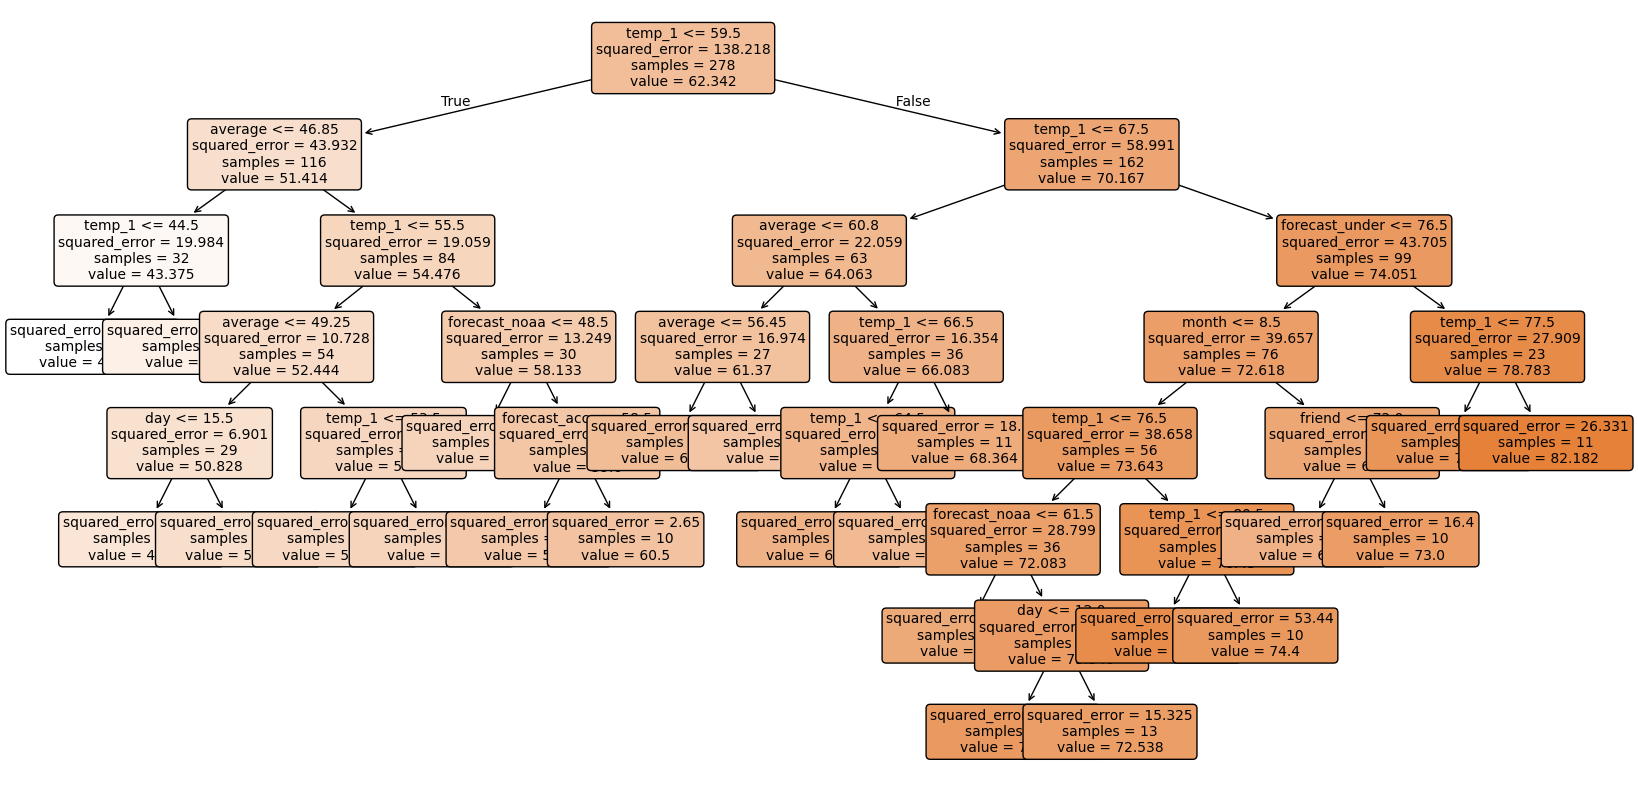

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(df_dt, 
          feature_names=x_train.columns, 
          #class_names=[str(c) for c in df_dt.__class__],  # Solo si es clasificación
          filled=True, 
          rounded=True,
          fontsize=10)
plt.show()

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [23]:
#la regresion es para predecir un valor numerico continuo. 
from sklearn.tree import DecisionTreeRegressor

df_dt = DecisionTreeRegressor(max_depth=3, min_samples_split=10, min_samples_leaf=10, #maxima profundidad 2
                                  random_state=42)
df_dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, min_samples_split=10,
                      random_state=42)

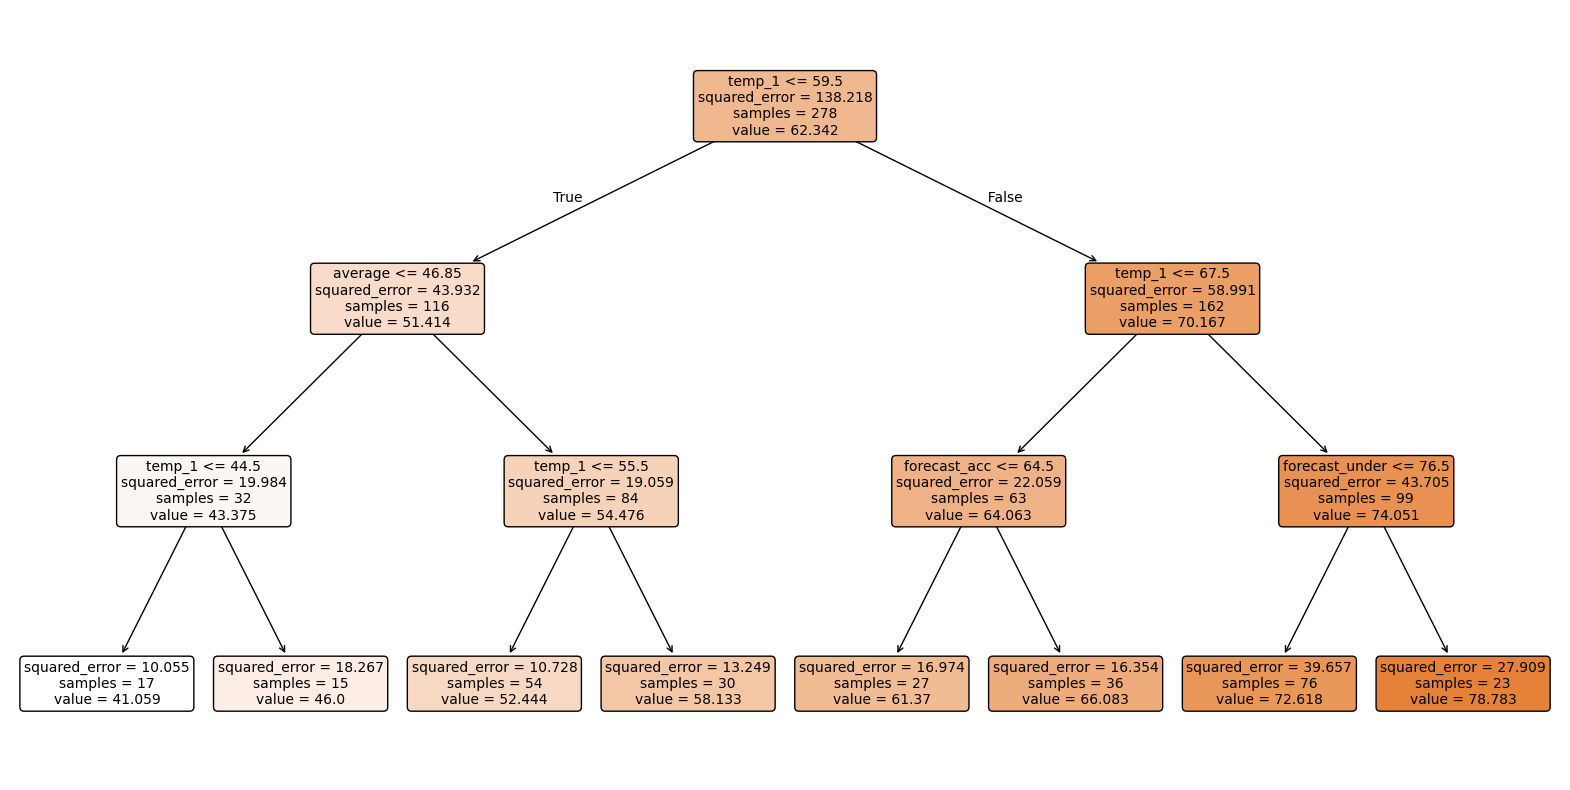

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(df_dt, 
          feature_names=x_train.columns, 
          #class_names=[str(c) for c in df_dt.__class__],  # Solo si es clasificación
          filled=True, 
          rounded=True,
          fontsize=10)
plt.show()

### 8. Vuelve a evaluar tu modelo

In [25]:
predictions = df_dt.predict(x_test)


print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions)) 
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("r2_score test",df_dt.score(x_test, y_test))
print("r2_score train",df_dt.score(x_train, y_train))

MAE: 4.5567196265742504
MAPE: 0.07147155657048516
MSE: 34.11001819765438
RMSE: 5.840378258097191
r2_score test 0.7560526120516178
r2_score train 0.8406061498996804


### 9. Vuelve a representar su árbol

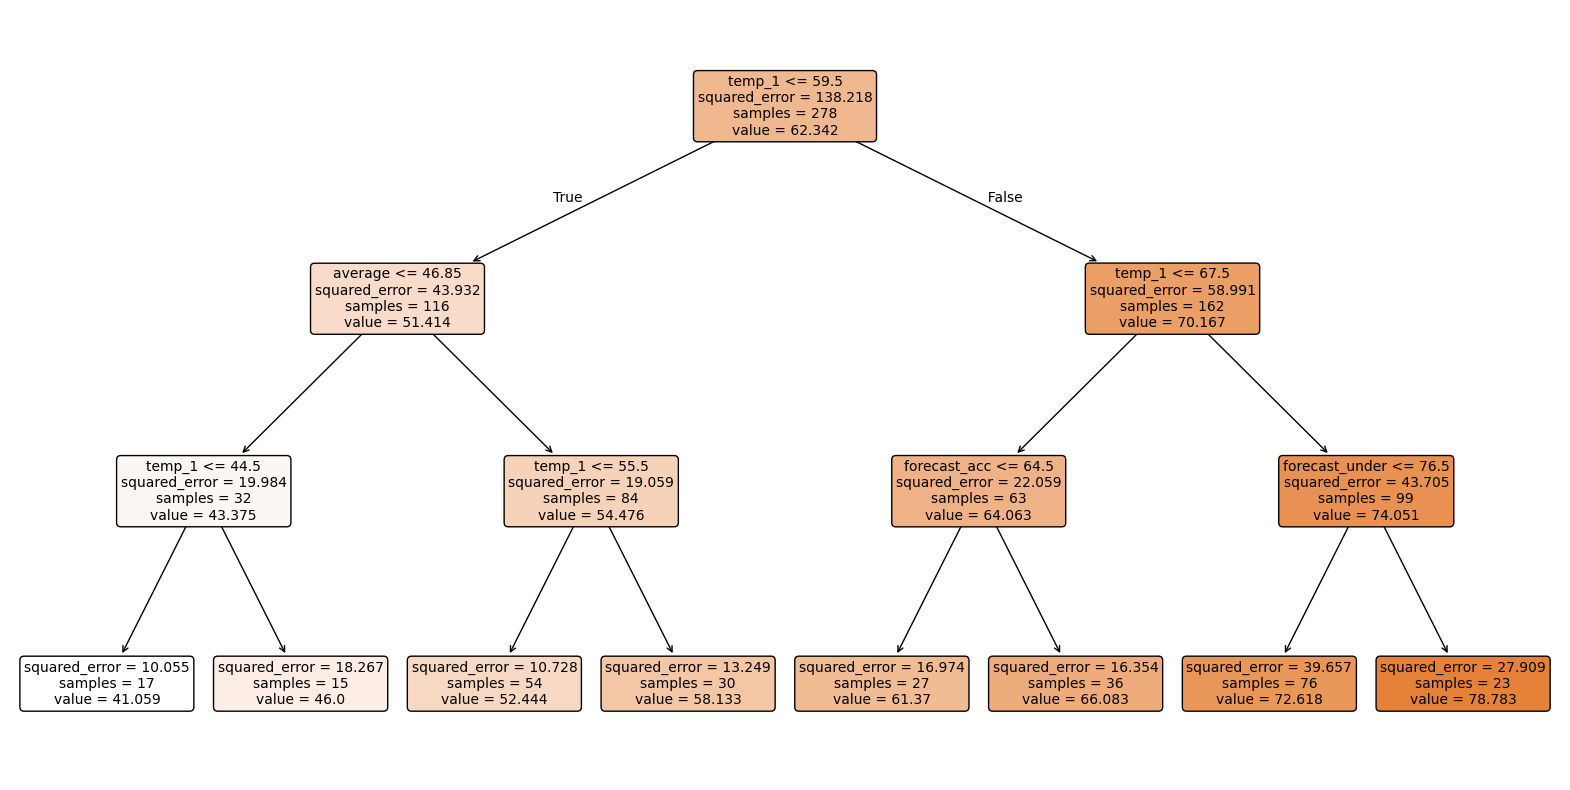

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(df_dt, 
          feature_names=x_train.columns, 
          #class_names=[str(c) for c in df_dt.__class__],  # Solo si es clasificación
          filled=True, 
          rounded=True,
          fontsize=10)
plt.show()

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:


parameters = {
    "max_depth" : [2,3,4,5,6,7,8,9,10],
}

dtr_gs = GridSearchCV(df_dt, parameters, cv=5, scoring="neg_mean_absolute_error")  #cv es Cross validation y se quedará cn la media
#decada uno de los parameters (1,2,3,4,5). buscará el scoring más alto posible pero en negativo

El grid siempre da el mejor parámetro que nosotros le pasamos. En la regresion el mae cuant más pequeño, mejor, por eso le ponemos el signo negativo

In [29]:
best_model = dtr_gs.fit(x_train, y_train)

In [30]:
dtr_gs.best_params_   #aqui veo cua lmodelo es el mejor 

{'max_depth': 5}

### 11. Obten el `feature_importances` de cada variable en el último modelo

In [31]:
# Obtener el mejor modelo del GridSearch
mejor_modelo = dtr_gs.best_estimator_

# Ahora sí puedes sacar la importancia de los features
importancias = mejor_modelo.feature_importances_

importancias_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': importancias
})

In [32]:
importancias_df

,feature,importance
0,month,0.006618
1,day,0.000818
2,forecast_under,0.019882
3,forecast_acc,0.000480
4,forecast_noaa,0.003825
5,friend,0.006260
6,temp_2,0.000000
7,temp_1,0.861082
8,average,0.101034


In [33]:
mejor_modelo

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=10,
                      random_state=42)

In [34]:
mejor_modelo.predict(x_test)

array([66.5       , 60.        , 51.64705882, 66.13333333, 63.5       ,
       76.45      , 76.45      , 76.45      , 62.64285714, 76.45      ,
       62.64285714, 76.45      , 41.05882353, 60.        , 72.08333333,
       55.2       , 62.64285714, 55.        , 55.2       , 76.45      ,
       63.5       , 55.2       , 66.13333333, 60.        , 58.7       ,
       51.64705882, 63.5       , 46.        , 60.5       , 75.66666667,
       72.08333333, 66.13333333, 55.2       , 82.18181818, 75.66666667,
       62.64285714, 55.        , 51.64705882, 66.5       , 46.        ,
       72.08333333, 53.58333333, 76.45      , 41.05882353, 60.        ,
       76.45      , 55.        , 82.18181818, 53.58333333, 41.05882353,
       46.        , 41.05882353, 66.13333333, 66.13333333, 66.5       ,
       60.        , 55.2       , 60.5       , 53.58333333, 60.5       ,
       63.5       , 49.66666667, 62.64285714, 73.        , 62.64285714,
       60.5       , 72.08333333, 72.08333333, 75.66666667, 41.05

In [35]:
y_pred_2 = mejor_modelo.predict(x_test)

print("MAE", mean_absolute_error(y_test, y_pred_2))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred_2))
print("MSE", mean_squared_error(y_test, y_pred_2))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred_2)))

MAE 3.7258590709010875
MAPE 0.059213180998387314
MSE 23.00747080927423
RMSE 4.796610345783179


### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
df_class = df.copy()

In [38]:
df_class["mayor_59"] = df_class["actual"].apply(lambda x: 1 if x > 59 else 0)

In [39]:
df_class

,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,mayor_59
0,1,1,45,45,45.6,45,43,50,44,29,0
1,1,2,44,45,45.7,44,41,50,44,61,0
2,1,3,45,44,45.8,41,43,46,47,56,0
3,1,4,44,41,45.9,40,44,48,46,53,0
4,1,5,41,40,46.0,44,46,46,46,41,0
...,...,...,...,...,...,...,...,...,...,...,...
343,12,27,42,42,45.2,47,41,50,47,47,0
344,12,28,42,47,45.3,48,41,49,44,58,0
345,12,29,47,48,45.3,48,43,50,45,65,0
346,12,30,48,48,45.4,57,44,46,44,42,0


In [40]:
X = df_class[['day', 'forecast_under', 'forecast_acc', 'forecast_noaa', 'friend', 'temp_2', 'temp_1', 'average']]

In [41]:
y = df_class['mayor_59'].values

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:


df_class = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=10, 
                                  random_state=42,)
df_class.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

In [44]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

**Accuracy_score** = compara las predicciones del modelo (predictions) con las etiquetas reales (Y_test, que es el verdadero valor que deberías haber predicho).

In [45]:
# Paso 1: Obtener las probabilidades de predicción
probs = df_class.predict_proba(x_test)
umbral = 0.5

predictions = (probs[:, 1] >= umbral).astype(int)
predictions = df_class.predict(x_test)

# Evaluar la precisión (accuracy)
acierto = accuracy_score(y_test, predictions)

# Calcular el error
error = 1 - acierto
print("Acierto:", round(acierto * 100, 2), "%")
print("Error:", round(error * 100, 2), "%")

# Opcional: Si quieres ver las primeras predicciones
print("Primeras predicciones:", predictions[:10])

Acierto: 91.43 %
Error: 8.57 %
Primeras predicciones: [1 1 0 1 1 1 1 1 1 1]


Usar una **matriz de confusión** es una forma de evaluar el rendimientodel modelo, especialmente cuando estás trabajando con problemas de clasificación.


[[23  5]
 [ 1 41]]


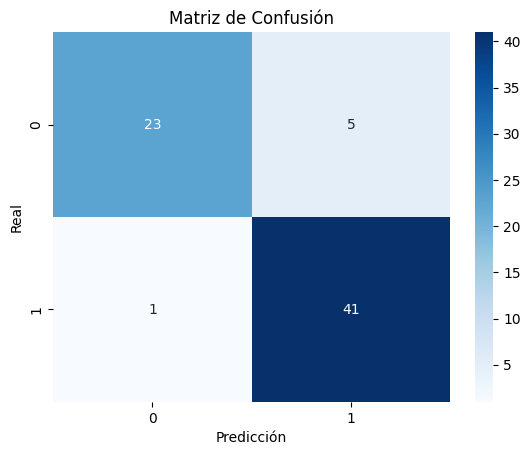

In [46]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, predictions)


print(c_matrix)

# Visualiza la matriz de confusión con un heatmap
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

La **precisión** es una métrica que indica la proporción de predicciones positivas correctas entre todas las predicciones positivas realizadas por el modelo. Es decir, de todas las veces que el modelo predijo la clase 1 (positiva), cuántas veces estuvo en lo cierto.

In [47]:
TN, FP, FN, TP = c_matrix.ravel()

# Calcula la precisión
precision = TP / (TP + FP)

# Muestra el resultado
print("Precisión:", round(precision, 4))

Precisión: 0.8913


El recall (o sensibilidad o tasa de verdaderos positivos) mide la capacidad de un modelo para identificar correctamente todas las instancias de la clase positiva.

In [48]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions)

# Muestra el resultado
print("Recall:", round(recall, 4))

Recall: 0.9762


es una métrica **combinada de precisión y recall** que busca equilibrar ambas. Se utiliza especialmente cuando tienes un desequilibrio en las clases (es decir, cuando una clase es mucho más frecuente que la otra), o cuando prefieres un balance entre precisión y recall.

In [49]:
from sklearn.metrics import f1_score

# Realizamos las predicciones con el modelo
predictions = df_class.predict(x_test)

# Calculamos el F1 Score
f1 = f1_score(y_test, predictions)

print("F1 Score:", round(f1, 2))

F1 Score: 0.93
